In [24]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [25]:
train_data = unpickle('data/train')
test_data = unpickle('data/test')
labels = unpickle('data/meta')
interesting_coarse_labels = [0, 1]  # Aquatic mammals and Fish


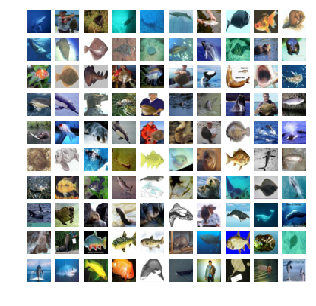

In [26]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break

train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Visualizing CIFAR 100
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i + 1][0])


In [27]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(y):
    y = np.clip(y, -500, 500)
    return 1.0 / (1.0 + np.exp(-y))


def log_loss(y, ypred):
    eps = 10 ** -15
    ypred = np.clip(ypred, eps, 1 - eps)
    total_cost = -np.sum(ypred[y])
    #total_cost = -np.sum(y * np.log(ypred) + np.subtract(1, y) * np.log(np.subtract(1, ypred)))
    #return total_cost / (np.shape(ypred)[0] * np.shape(ypred)[1])
    return total_cost / len(y)


def get_updated_weights(w, learning_rate, x, y, ypred):
    der = learning_rate * np.dot((ypred - y).T, x) + (0.1 * 2 * w)
    der = der / np.shape(ypred)[0]
    w = w - (learning_rate * der)
    return w


def add_bias_term(x):
    return np.insert(x, 0, [1], axis=1)


def trainData(x, y, iteration=100, learning_rate=1):
    X = add_bias_term(x)  # add constant 1 to account for bias
    print("Mean {}".format(np.mean(X)))
    # X = X - np.mean(X)
    # X = X / np.std(X)
    labels_count = len(np.unique(y))
    weight_matrix = np.full((labels_count, np.shape(X)[1]), 0.1)
    losses = []
    weights = [weight_matrix]
    plt.ion()
    for i in range(iteration):
        ypred = sigmoid(X.dot(weight_matrix.T))
        loss = log_loss(y, ypred)
        if i % 1 == 0:
            print("Iteration ", i, " and loss ", loss)
            losses.append(loss)
            # plt.plot(i, loss)
#             plt.scatter(i, loss)
#             plt.show()
#             plt.pause(0.1)
        current_weight = get_updated_weights(weight_matrix, learning_rate, X, y, ypred)
        weights.append(current_weight)
        weight_matrix = np.sum(weights, axis=0) / len(weights)

    return weight_matrix, losses


def predict(weight_matrix, x_test):
    return np.argmax(sigmoid(x_test.dot(weight_matrix.T)))


def accuracy(weight_matrix, test, y_test):
    test = add_bias_term(test)
    success = 0
    number_of_samples = np.shape(test)[0]
    for i in range(number_of_samples):
        predicted_class = predict(weight_matrix, test[i, :])
        actual_class = np.argmax(y_test[i])
        if predicted_class == actual_class:
            success += 1
    print(success)
    print(number_of_samples)
    return (success / number_of_samples) * 100


In [37]:
x1 = np.array([[0, 1], [1, 0], [0, 1]])
#y1 = np.array([[1, 0], [0, 1], [1, 0]])
y1 = np.array([0, 1, 0])
X = add_bias_term(x1)
labels_count = len(np.unique(y1))
weight_matrix = np.full((labels_count, np.shape(X)[1]), 0.1)
losses = []
weights = [weight_matrix]
ypred = sigmoid(X.dot(weight_matrix.T))
loss = log_loss(y, ypred)
loss


ypred[np.arange(len(ypred)), y1]

array([ 0.549834,  0.549834,  0.549834])

In [29]:
ypred[0, 0]

0.54983399731247795

In [30]:
y_reshaped = []
for i in y:
    if i == 0:
        y_reshaped.append([1, 0])
    else:
        y_reshaped.append([0, 1])
y_reshaped = np.array(y_reshaped)
weight_matrix, losses = trainData(train[:, :], y_reshaped[:, :],
                                         iteration=21, learning_rate=0.1)

Mean 116.26829144158802
Iteration  0  and loss  -4.0
Iteration  1  and loss  -4e-15
Iteration  2  and loss  -2.0
Iteration  3  and loss  -2.0
Iteration  4  and loss  -1.0
Iteration  5  and loss  -4.0
Iteration  6  and loss  -4e-15
Iteration  7  and loss  -4.0
Iteration  8  and loss  -4e-15
Iteration  9  and loss  -3.0
Iteration  10  and loss  -4e-15
Iteration  11  and loss  -4.0
Iteration  12  and loss  -4e-15
Iteration  13  and loss  -4.0
Iteration  14  and loss  -4e-15
Iteration  15  and loss  -4.0
Iteration  16  and loss  -4e-15
Iteration  17  and loss  -4.0
Iteration  18  and loss  -4e-15
Iteration  19  and loss  -4.0
Iteration  20  and loss  -1.0


In [31]:
test_y_reshaped = []
for i in y_test:
    if i == 0:
        test_y_reshaped.append([1, 0])
    else:
        test_y_reshaped.append([0, 1])
test_y_reshaped = np.array(test_y_reshaped)
accuracy(weight_matrix, test, test_y_reshaped)


617
1000


61.7

In [32]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(verbose = 5, penalty='l2', multi_class='ovr', solver='liblinear', max_iter=20, n_jobs = -1)
lr.fit(train[:, :], y)


/home/prithvi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/home/prithvi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [33]:
lr.score(test, y_test)

0.66700000000000004

In [34]:
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b


# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)


# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients


# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)


 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)


def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(train, y, test, y_test,learning_rate = 0.01, num_iterations = 20)


ValueError: operands could not be broadcast together with shapes (5000,) (1,3072) 

In [ ]:
import numpy as np
x1 = np.array([[0, 1], [1, 0], [0, 1]])
x1[np.arange(len(x1)), [0, 1, 0]]